In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/owid-covid-data.csv")

# View structure
print(df.columns)
print(df.head())

# Check for missing data
missing_data = df.isnull().sum()
print(missing_data)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [2]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Choose countries to analyze
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Drop rows with no date or total_cases
df = df.dropna(subset=['date', 'total_cases'])

# Fill missing numeric values with 0
df.fillna(0, inplace=True)

# Preview cleaned data
print(df[['location', 'date', 'total_cases', 'total_deaths']].head())

       location       date  total_cases  total_deaths
173549    India 2020-01-05          0.0           0.0
173550    India 2020-01-06          0.0           0.0
173551    India 2020-01-07          0.0           0.0
173552    India 2020-01-08          0.0           0.0
173553    India 2020-01-09          0.0           0.0


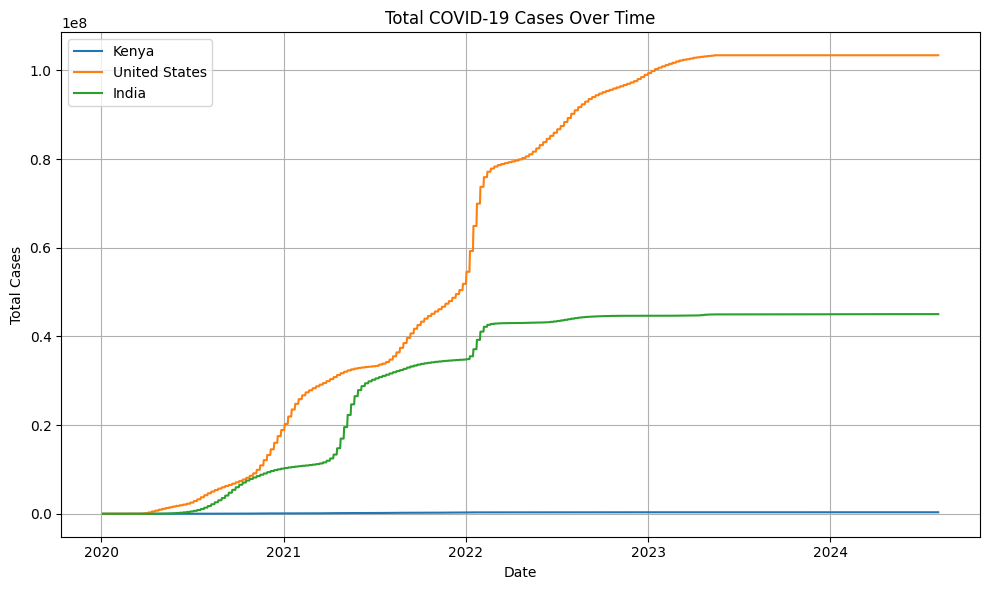

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total Cases Over Time
plt.figure(figsize=(10,6))
for country in countries:
    temp = df[df['location'] == country]
    plt.plot(temp['date'], temp['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../outputs/charts/total_cases_over_time.png")
plt.show()

# Death Rate Computation
df['death_rate'] = df['total_deaths'] / df['total_cases']

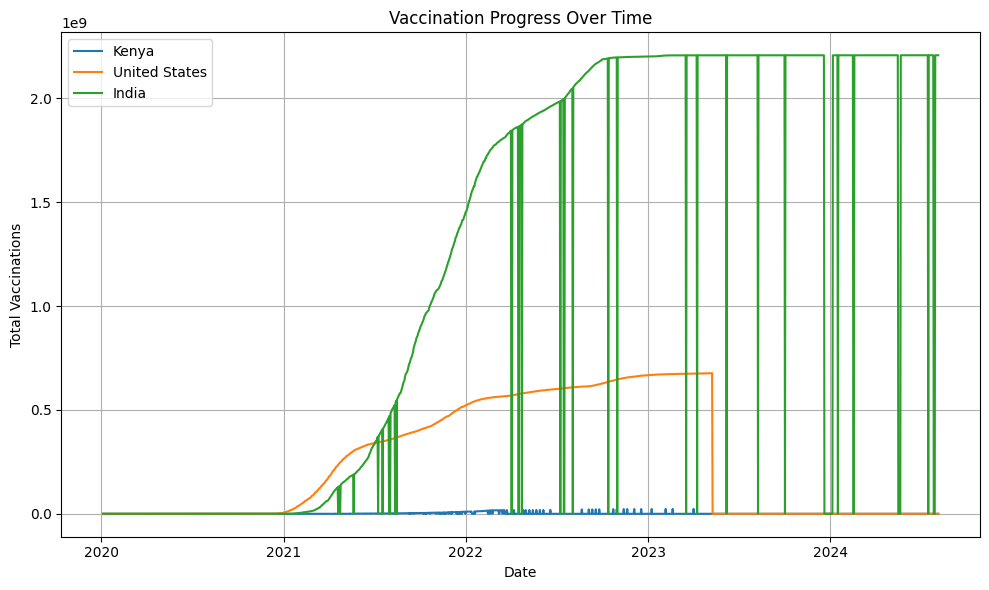

In [4]:
# Vaccination Over Time
plt.figure(figsize=(10,6))
for country in countries:
    temp = df[df['location'] == country]
    plt.plot(temp['date'], temp['total_vaccinations'], label=country)

plt.title("Vaccination Progress Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../outputs/charts/vaccinations_over_time.png")
plt.show()

# % Vaccinated
df['percent_vaccinated'] = (df['people_vaccinated'] / df['population']) * 100

In [5]:
import plotly.express as px

# Get latest date snapshot
latest = df[df['date'] == df['date'].max()]

fig = px.choropleth(latest,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    title='Total COVID-19 Cases by Country',
                    color_continuous_scale='Reds')
fig.write_html("../outputs/charts/choropleth_cases.html")
fig.show()